<a href="https://colab.research.google.com/github/GabrielTrentino/TCC/blob/master/TCC_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando Bibliotecas:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Importando o Dataset:

In [2]:
data_path = "https://raw.githubusercontent.com/GabrielTrentino/TCC/master/DadosGerais%20-%20Plan1.csv"
df = pd.read_csv(data_path)
df.head(1)

,DateTime,MÊS,ANO,PIB,PIB_CONS_POR,vol_PIB_BRASIL,vol_PIB_GOIAS,IBOVESPA_POR,DOLAR,SELIC,Desemprego,PJ total,PF não rotativo,IPCA,Salário
0,1/2005,1,2005,NaN,NaN,2.170585e+09,53865113.0,-7.04,27074.0,18.25,NaN,NaN,NaN,NaN,NaN


In [3]:
df.index = pd.to_datetime(df.DateTime, format = "%m/%Y")
df.drop(["MÊS", "ANO", "DateTime"], inplace = True, axis = 1)

df.PIB_CONS_POR = df.PIB_CONS_POR.str.replace(',','.').astype(float)
df.interpolate(method='linear', inplace = True)
df.head(1)

,PIB,PIB_CONS_POR,vol_PIB_BRASIL,vol_PIB_GOIAS,IBOVESPA_POR,DOLAR,SELIC,Desemprego,PJ total,PF não rotativo,IPCA,Salário
DateTime,,,,,,,,,,,,
2005-01-01,NaN,NaN,2.170585e+09,53865113.0,-7.04,27074.0,18.25,NaN,NaN,NaN,NaN,NaN


#Observando informações do Dataset:

In [4]:
df.shape

(184, 12)

In [5]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)

PF não rotativo    0.527174
PJ total           0.527174
Desemprego         0.467391
IPCA               0.336957
Salário            0.021739
PIB_CONS_POR       0.010870
PIB                0.010870
SELIC              0.000000
DOLAR              0.000000
IBOVESPA_POR       0.000000
vol_PIB_GOIAS      0.000000
vol_PIB_BRASIL     0.000000
dtype: float64

In [6]:
df.dtypes

PIB                float64
PIB_CONS_POR       float64
vol_PIB_BRASIL     float64
vol_PIB_GOIAS      float64
IBOVESPA_POR       float64
DOLAR              float64
SELIC              float64
Desemprego         float64
PJ total           float64
PF não rotativo    float64
IPCA               float64
Salário            float64
dtype: object

In [7]:
df.describe().round(2)

,PIB,PIB_CONS_POR,vol_PIB_BRASIL,vol_PIB_GOIAS,IBOVESPA_POR,DOLAR,SELIC,Desemprego,PJ total,PF não rotativo,IPCA,Salário
count,182.00,182.00,1.840000e+02,1.840000e+02,184.00,184.00,184.00,98.00,87.00,87.00,122.00,180.00
mean,2.22,1.28,4.704796e+09,1.330519e+08,1.79,23306.29,11.10,9.83,2.40,5.52,5.79,650.59
std,2.96,7.06,1.584133e+09,4.936647e+07,6.78,11102.35,3.58,2.43,8.03,11.80,2.03,232.93
min,-4.60,-11.40,2.170585e+09,5.386511e+07,-24.80,1.96,4.25,6.20,-11.56,-17.11,2.46,300.00
25%,0.98,-3.85,3.109803e+09,8.241756e+07,-3.29,17622.25,8.59,7.32,-2.45,-1.66,4.41,452.50
50%,2.23,2.10,4.814760e+09,1.387578e+08,1.21,22079.00,11.16,10.95,1.73,5.85,5.80,622.00
75%,4.37,6.74,6.269328e+09,1.817596e+08,6.90,31966.25,13.35,12.00,10.20,15.88,6.63,880.00
max,7.50,15.50,6.583319e+09,1.918987e+08,16.97,44981.00,19.75,13.70,15.53,22.47,10.71,1045.00


#Matriz de Correlação:

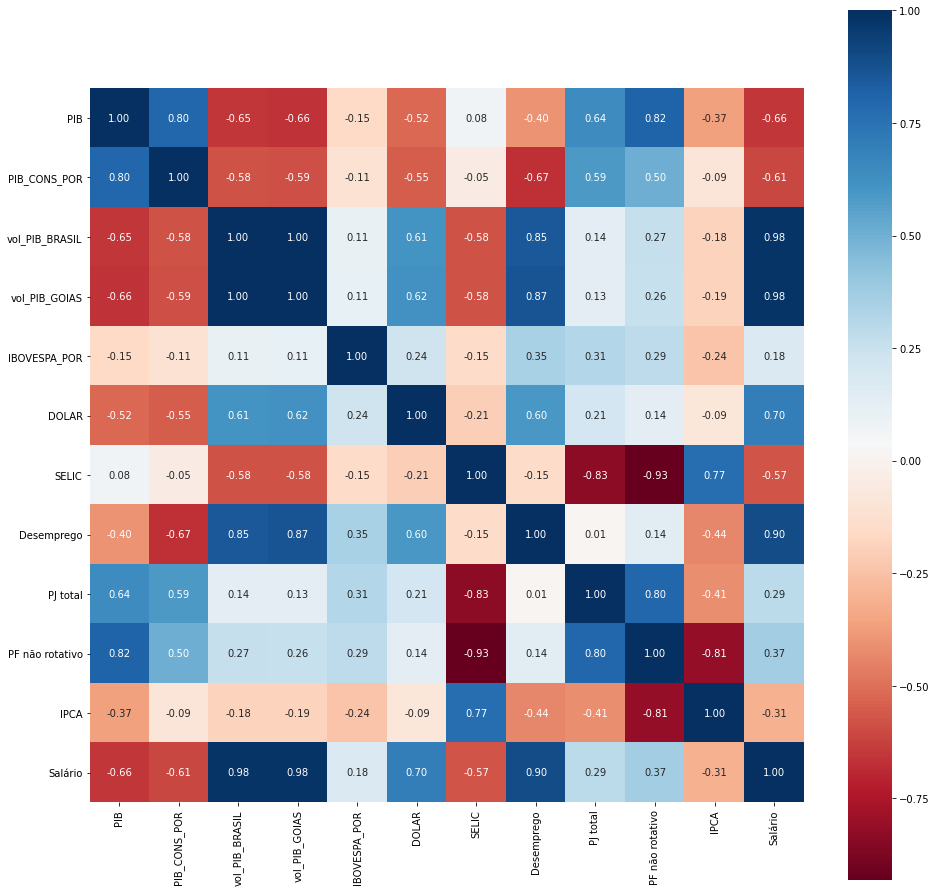

In [8]:
fig, ax = plt.subplots(figsize = (16,16))

sns.heatmap(df.corr(), cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


#Observando o Comportamento entre duas variáveis:

##SELIC X Salário:

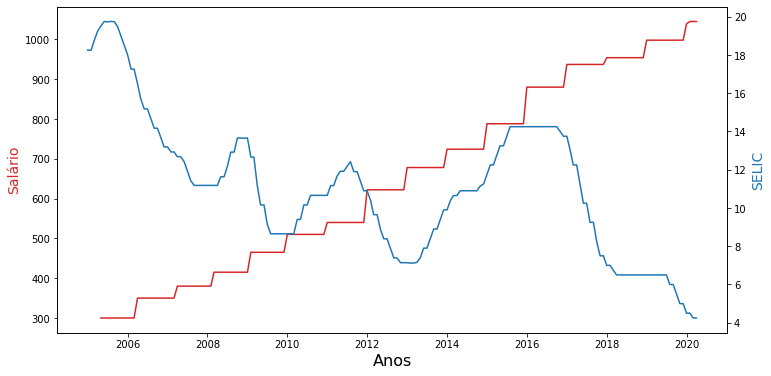

In [9]:
fig, ax1 = plt.subplots(figsize = (12,6))
color = 'tab:red'
ax1.set_xlabel('Anos', fontsize = 16)
ax1.set_ylabel('Salário', fontsize = 14, color=color)
ax1.plot(df.index, df.Salário, label = "Salário", color = color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('SELIC', fontsize = 14, color=color)
ax2.plot(df.index, df.SELIC, label = "SELIC");

##SELIC X Concensão de Crédito

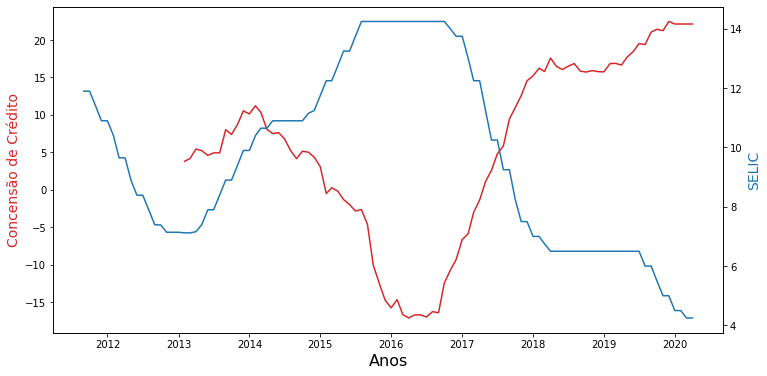

In [10]:
fig, ax1 = plt.subplots(figsize = (12,6))
color = 'tab:red'
ax1.set_xlabel('Anos', fontsize = 16)
ax1.set_ylabel('Concensão de Crédito', fontsize = 14, color=color)
ax1.plot(df.index[80:], df["PF não rotativo"][80:], label = "Concensão de Crédito", color = color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('SELIC', fontsize = 14, color=color)
ax2.plot(df.index[80:], df.SELIC[80:], label = "SELIC");

##SELIC X IPCA:

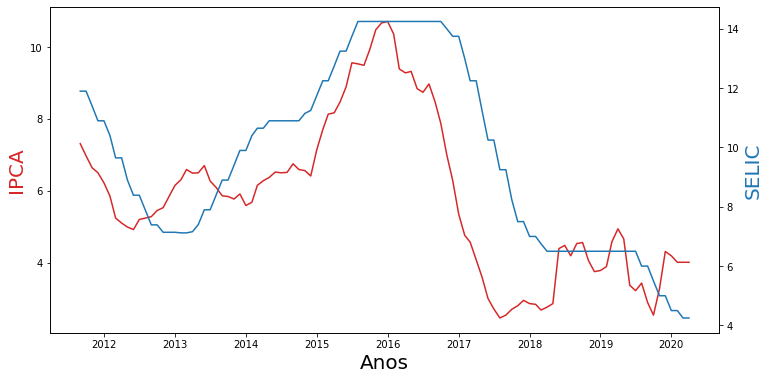

In [11]:
fig, ax1 = plt.subplots(figsize = (12,6))
color = 'tab:red'
ax1.set_xlabel('Anos', fontsize = 20)
ax1.set_ylabel('IPCA', fontsize = 20, color=color)
ax1.plot(df.index[80:], df.IPCA[80:], label = "IPCA", color = color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('SELIC', fontsize = 20, color=color)
ax2.plot(df.index[80:], df.SELIC[80:], label = "SELIC");

##PIB GOIAS X PIB BRASIL:

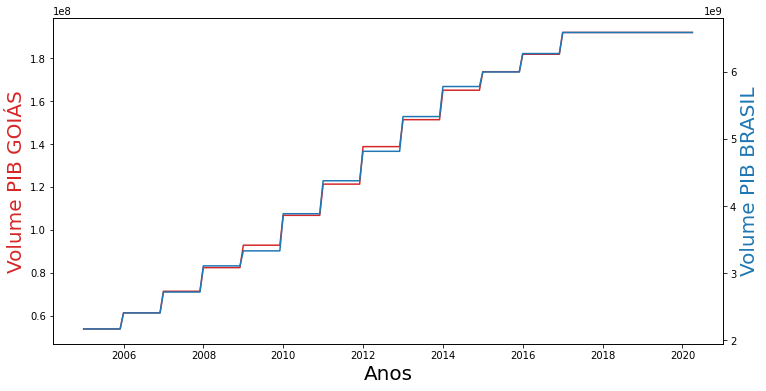

In [12]:
fig, ax1 = plt.subplots(figsize = (12,6))
color = 'tab:red'
ax1.set_xlabel('Anos', fontsize = 20)
ax1.set_ylabel('Volume PIB GOIÁS', fontsize = 20, color=color)
ax1.plot(df.index, df.vol_PIB_GOIAS, color = color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Volume PIB BRASIL', fontsize = 20, color=color)
ax2.plot(df.index, df.vol_PIB_BRASIL);

##PIB CONS X PIB BRASIL:

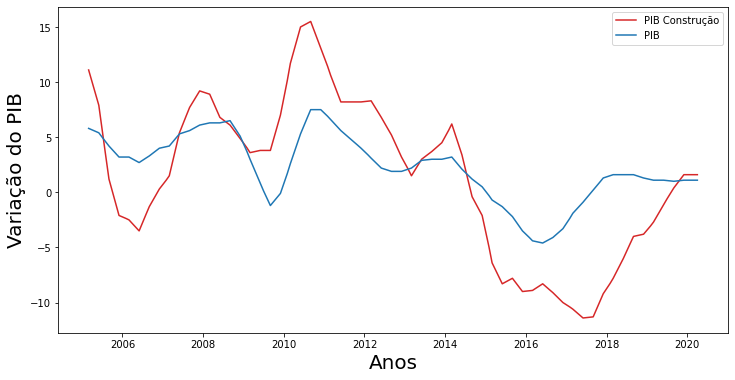

In [13]:
fig, ax1 = plt.subplots(figsize = (12,6))
color = 'tab:red'
plt.xlabel('Anos', fontsize = 20)
plt.ylabel('Variação do PIB', fontsize = 20)
plt.plot(df.PIB_CONS_POR.dropna(), color = color, label = "PIB Construção")

color = 'tab:blue'
plt.plot(df.PIB.dropna(), color = color, label = "PIB")
plt.legend();

#Parte 2: Metragens:

In [14]:
metragem_path = 'https://raw.githubusercontent.com/GabrielTrentino/TCC/master/Metragem_por_Tipo.csv'
df_metragem = pd.read_csv(metragem_path)
df_metragem.index = pd.to_datetime(df_metragem["Unnamed: 0"], format = "%m/%Y")
df_metragem.drop("Unnamed: 0", axis = 1, inplace=True)
df_metragem.head()

,Tipo,Alto,Normal,Baixo,Mínimo
Unnamed: 0,,,,,
2005-01-01,Tipo1,NaN,491.59,357.25,296.73
2005-01-01,Tipo2,NaN,552.51,400.47,333.38
2005-01-01,Tipo3,NaN,547.90,405.80,343.79
2005-01-01,Tipo4,552.31,467.12,337.99,NaN
2005-01-01,Tipo5,NaN,598.81,432.28,363.71


In [28]:
df_new = pd.DataFrame()
df_new['Tipo1Norm'] = df_metragem.query("Tipo == 'Tipo1'").Normal
df_new['Tipo1Baix'] = df_metragem.query("Tipo == 'Tipo1'").Baixo
df_new['Tipo1Mini'] = df_metragem.query("Tipo == 'Tipo1'").Mínimo
df_new['Tipo2Norm'] = df_metragem.query("Tipo == 'Tipo2'").Normal
df_new['Tipo2Baix'] = df_metragem.query("Tipo == 'Tipo2'").Baixo
df_new['Tipo2Mini'] = df_metragem.query("Tipo == 'Tipo2'").Mínimo
df_new['Tipo3Norm'] = df_metragem.query("Tipo == 'Tipo3'").Normal
df_new['Tipo3Baix'] = df_metragem.query("Tipo == 'Tipo3'").Baixo
df_new['Tipo3Mini'] = df_metragem.query("Tipo == 'Tipo3'").Mínimo
df_new['Tipo4Norm'] = df_metragem.query("Tipo == 'Tipo4'").Normal
df_new['Tipo4Baix'] = df_metragem.query("Tipo == 'Tipo4'").Baixo
df_new['Tipo4Alto'] = df_metragem.query("Tipo == 'Tipo4'").Alto
df_new['Tipo5Norm'] = df_metragem.query("Tipo == 'Tipo5'").Normal
df_new['Tipo5Baix'] = df_metragem.query("Tipo == 'Tipo5'").Baixo
df_new['Tipo5Mini'] = df_metragem.query("Tipo == 'Tipo5'").Mínimo
df_new['Tipo6Norm'] = df_metragem.query("Tipo == 'Tipo6'").Normal
df_new['Tipo6Baix'] = df_metragem.query("Tipo == 'Tipo6'").Baixo
df_new['Tipo6Mini'] = df_metragem.query("Tipo == 'Tipo6'").Mínimo
df_new['Tipo7Norm'] = df_metragem.query("Tipo == 'Tipo7'").Normal
df_new['Tipo7Baix'] = df_metragem.query("Tipo == 'Tipo7'").Baixo
df_new['Tipo7Mini'] = df_metragem.query("Tipo == 'Tipo7'").Mínimo
df_new = df_new[97:]
df_new.head()

,Tipo1Norm,Tipo1Baix,Tipo1Mini,Tipo2Norm,Tipo2Baix,Tipo2Mini,Tipo3Norm,Tipo3Baix,Tipo3Mini,Tipo4Norm,Tipo4Baix,Tipo4Alto,Tipo5Norm,Tipo5Baix,Tipo5Mini,Tipo6Norm,Tipo6Baix,Tipo6Mini,Tipo7Norm,Tipo7Baix,Tipo7Mini
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2013-02-01,870.62,604.88,522.83,979.16,679.57,587.40,974.54,693.58,607.96,829.04,572.85,966.19,1057.70,734.44,639.12,898.29,680.33,605.94,778.22,592.35,524.66
2013-03-01,870.31,607.91,525.92,978.74,682.83,590.76,973.66,696.25,610.94,828.13,575.29,970.03,1056.91,737.74,642.73,898.31,682.23,607.91,777.37,593.68,526.26
2013-04-01,874.64,610.41,532.68,983.89,686.07,598.62,978.81,700.02,619.04,832.38,577.69,976.14,1062.74,741.86,651.17,903.33,687.61,615.31,782.43,598.32,533.55
2013-05-01,824.72,575.44,499.21,928.02,646.83,561.19,922.75,659.55,580.28,785.26,544.56,925.62,1002.98,699.59,610.51,849.22,646.01,575.18,739.02,564.45,500.71
2013-06-01,886.91,619.69,541.45,997.69,696.52,608.50,993.11,711.03,629.57,844.60,586.56,987.63,1077.04,753.15,661.66,917.38,698.84,625.03,793.27,607.09,541.57


In [16]:
df_new.shape

(181, 21)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

#Primeira Tentativa:
Utilizando todos os dados disponíveis:

In [26]:
df.dropna(subset = ['PJ total'],axis = 0, inplace = True)

,Tipo1Norm,Tipo1Baix,Tipo1Mini,Tipo2Norm,Tipo2Baix,Tipo2Mini,Tipo3Norm,Tipo3Baix,Tipo3Mini,Tipo4Norm,Tipo4Baix,Tipo4Alto,Tipo5Norm,Tipo5Baix,Tipo5Mini,Tipo6Norm,Tipo6Baix,Tipo6Mini,Tipo7Norm,Tipo7Baix,Tipo7Mini
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,


In [27]:
X = df
y = df_new.Tipo1Norm

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print("Treino R² = {:.8f}\nTeste R² = {:.8f}".format(modelo.score(X_train,y_train), metrics.r2_score(y_test, y_pred)))

ValueError: ignored

In [22]:
X = df[:-10]
y = df_new.Tipo1Norm[:-10]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print("Treino R² = {:.8f}\nTeste R² = {:.8f}".format(modelo.score(X_train,y_train), metrics.r2_score(y_test, y_pred)))

y_pred = modelo.predict(X[-10:])
print("R² para valores não previstos: {}".format(metrics.explained_variance_score(y[-10:],y_pred)))

Treino R² = 0.98161548
Teste R² = 0.97298461
R² para valores não previstos: -0.8702151639895797


In [23]:
X_train = df.loc["2014"]
X_test = df.loc["2015"]
y_train = df_new.Tipo1Norm["2014"]
y_test = df_new.Tipo1Norm["2015"]

modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print("Treino R² = {:.8f}\nTeste R² = {:.8f}".format(modelo.score(X_train,y_train), metrics.r2_score(y_test, y_pred)))

Treino R² = 0.98379501
Teste R² = -3.43653993


#Técnica de Janela Móvel:

In [37]:
anos = ["2013","2014", "2015", "2016", "2017", "2018", "2019"]

for pos, i in enumerate(anos):
  if pos+1 == len(anos):
    break

  X_train = df.loc[i]
  X_test = df.loc[anos[pos+1]]
  y_train = df_new.Tipo1Norm[i]
  y_test = df_new.Tipo1Norm[anos[pos+1]]

  modelo = LinearRegression()
  modelo.fit(X_train, y_train)
  y_pred = modelo.predict(X_test)

  print("Treino {}".format(pos+1))
  print("Treino R² = {:.8f}\nTeste R² = {:.8f}".format(modelo.score(X_train,y_train), metrics.r2_score(y_test, y_pred)))
  print("RMSE: {:.3f}\n".format(metrics.mean_squared_error(y_test, y_pred)))

Treino 1
Treino R² = 0.86434447
Teste R² = -714.96386576
RMSE: 340849.746

Treino 2
Treino R² = 0.98379501
Teste R² = -3.43653993
RMSE: 2828.143

Treino 3
Treino R² = 0.97763015
Teste R² = -51.13807364
RMSE: 21008.893

Treino 4
Treino R² = 0.97046656
Teste R² = -148.45988760
RMSE: 60032.278

Treino 5
Treino R² = 0.95088809
Teste R² = -148.97676765
RMSE: 1634.593

Treino 6
Treino R² = 0.96288704
Teste R² = -6.20119515
RMSE: 5068.317



In [0]:
anos = ["2013","2014", "2015", "2016", "2017", "2018"]
for pos, i in enumerate(anos):
  print(anos[pos+1])